In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [10]:
data = pd.read_csv('../data/cocktail_dataset_preprocessed.csv')
data.set_index('id', inplace=True)

In [11]:
data

,alcoholic,IBA,category_Cocktail,category_Ordinary Drink,category_Punch / Party Drink,glass_Brandy snifter,glass_Champagne flute,glass_Cocktail glass,glass_Collins glass,glass_Copper Mug,glass_Highball glass,glass_Old-fashioned glass,glass_Pousse cafe glass,glass_Whiskey Glass,glass_Whiskey sour glass,glass_White wine glass,ingredientInName,instructionsLength,tagsCount,ingredientsCount,classic,gin
id,,,,,,,,,,,,,,,,,,,,,,
11000,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.509804,1.000000,0.75,1,0
11001,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.568627,0.444444,0.50,1,0
11002,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.392157,0.666667,1.00,0,1
11003,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000,0.222222,0.25,1,1
11004,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.294118,0.333333,0.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.078431,0.000000,0.25,0,0
11987,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.078431,0.000000,0.25,0,0
11989,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.215686,0.000000,0.25,0,0


In [12]:
correlation_matrix = data.corr()
correlation_matrix

,alcoholic,IBA,category_Cocktail,category_Ordinary Drink,category_Punch / Party Drink,glass_Brandy snifter,glass_Champagne flute,glass_Cocktail glass,glass_Collins glass,glass_Copper Mug,glass_Highball glass,glass_Old-fashioned glass,glass_Pousse cafe glass,glass_Whiskey Glass,glass_Whiskey sour glass,glass_White wine glass,ingredientInName,instructionsLength,tagsCount,ingredientsCount,classic,gin
alcoholic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IBA,NaN,1.000000,0.325766,-0.385299,0.213327,-0.035245,0.015439,-0.101948,-0.034021,0.213327,0.037895,0.134830,-0.050033,-0.035245,-0.043620,-0.035245,-0.109715,0.025010,0.622327,0.011979,0.825187,-0.062538
category_Cocktail,NaN,0.325766,1.000000,-0.922197,-0.018773,-0.018773,-0.046875,0.098727,-0.061484,-0.018773,0.025891,-0.011060,-0.026650,-0.018773,-0.064746,-0.018773,-0.113782,0.113787,0.412556,0.063380,0.303707,0.075265
category_Ordinary Drink,NaN,-0.385299,-0.922197,1.000000,-0.369341,0.020357,0.050830,-0.062015,0.066671,-0.369341,-0.011280,0.026342,0.028898,0.020357,0.070209,0.020357,0.123382,-0.090932,-0.420849,-0.033408,-0.360082,-0.046107
category_Punch / Party Drink,NaN,0.213327,-0.018773,-0.369341,1.000000,-0.007519,-0.018773,-0.076908,-0.024624,1.000000,-0.033053,-0.041527,-0.010673,-0.007519,-0.025931,-0.007519,-0.045570,-0.038336,0.096682,-0.065930,0.201142,-0.061657
glass_Brandy snifter,NaN,-0.035245,-0.018773,0.020357,-0.007519,1.000000,-0.018773,-0.076908,-0.024624,-0.007519,-0.033053,-0.041527,-0.010673,-0.007519,-0.025931,-0.007519,-0.045570,-0.122244,-0.040412,-0.134415,-0.037380,-0.061657
glass_Champagne flute,NaN,0.015439,-0.046875,0.050830,-0.018773,-0.018773,1.000000,-0.192029,-0.061484,-0.018773,-0.082528,-0.103688,-0.026650,-0.018773,-0.064746,-0.018773,0.061469,0.024553,-0.015327,0.034880,0.005926,-0.153951
glass_Cocktail glass,NaN,-0.101948,0.098727,-0.062015,-0.076908,-0.076908,-0.192029,1.000000,-0.251875,-0.076908,-0.338086,-0.424768,-0.109175,-0.076908,-0.265240,-0.076908,-0.283596,-0.351720,-0.163802,-0.306309,-0.134241,0.005939
glass_Collins glass,NaN,-0.034021,-0.061484,0.066671,-0.024624,-0.024624,-0.061484,-0.251875,1.000000,-0.024624,-0.108248,-0.136002,-0.034956,-0.024624,-0.084924,-0.024624,-0.011322,0.155356,-0.020104,0.210230,0.033812,-0.081669
glass_Copper Mug,NaN,0.213327,-0.018773,-0.369341,1.000000,-0.007519,-0.018773,-0.076908,-0.024624,1.000000,-0.033053,-0.041527,-0.010673,-0.007519,-0.025931,-0.007519,-0.045570,-0.038336,0.096682,-0.065930,0.201142,-0.061657


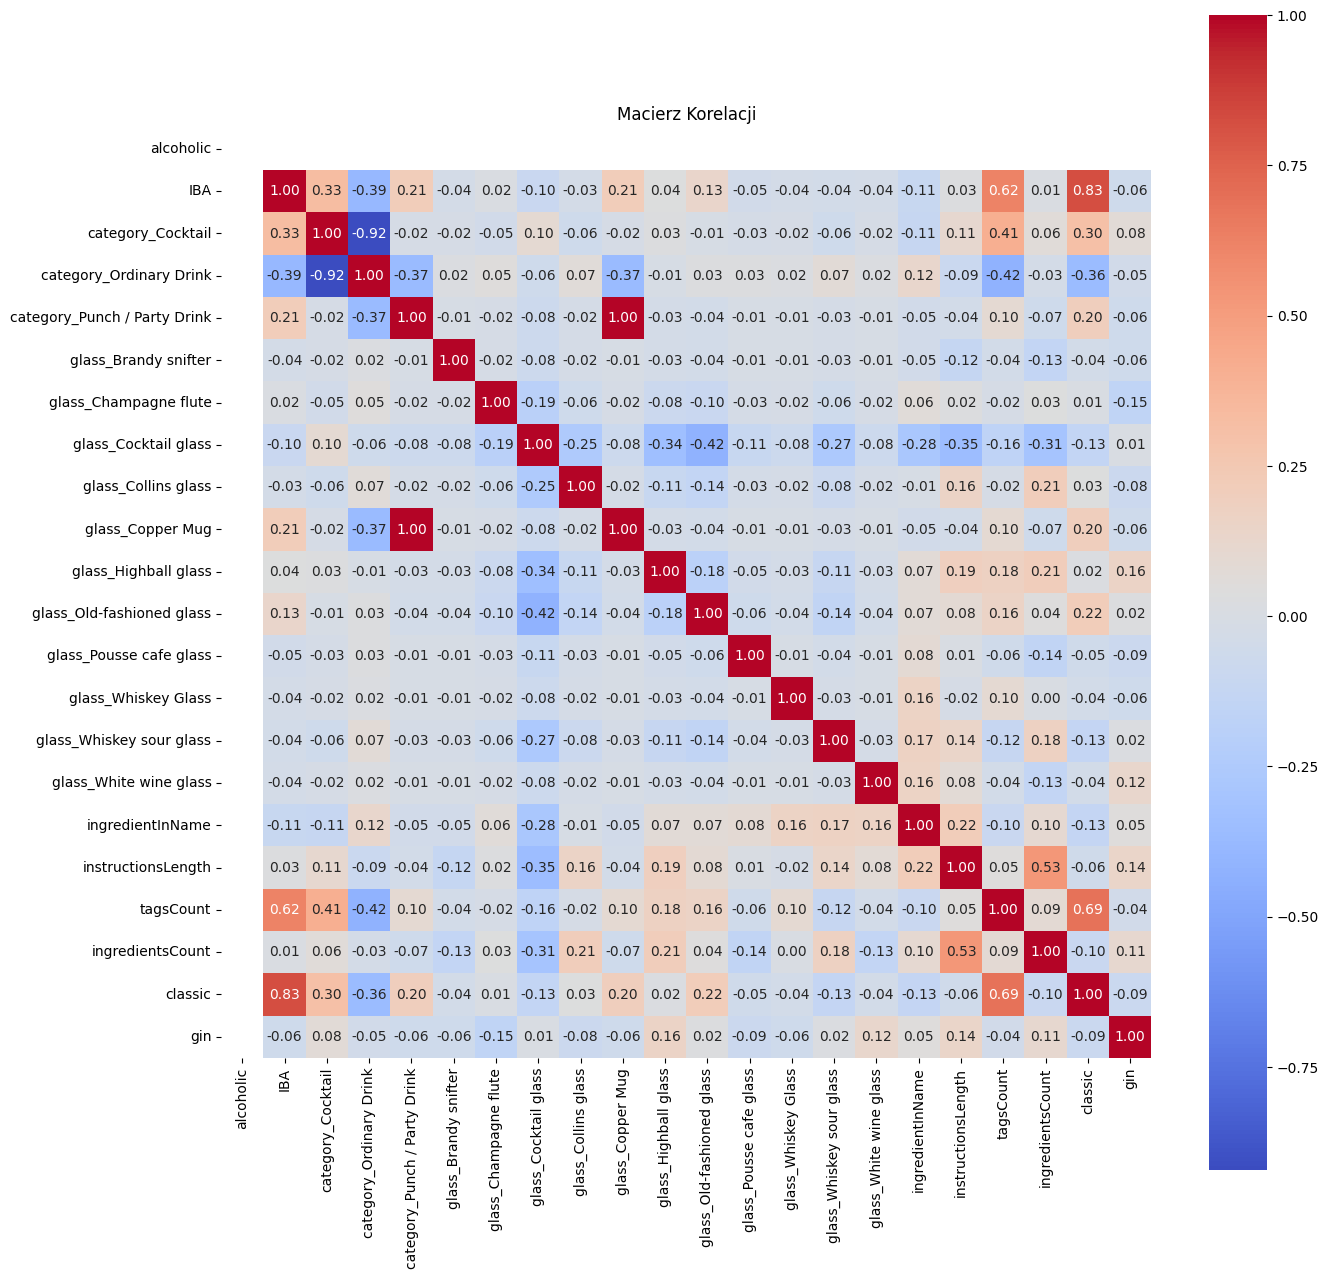

In [13]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Macierz Korelacji')
plt.show()

Widać kilka bardziej i mniej oczywistych korelacji. Na przykład fakt, że koktaje oznaczone IBA są pozytywnie skorelowane z tymi classic lub to, że ilość słów w instrukcji rośnie gdy rośnie ilość składników.

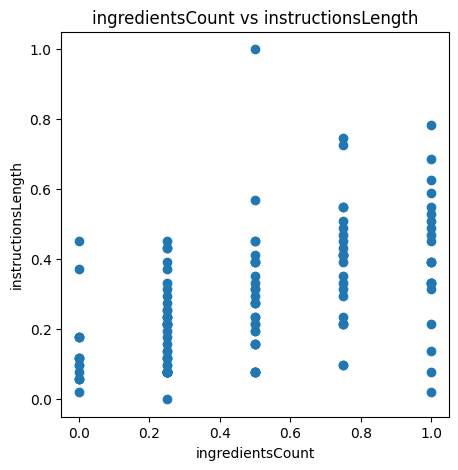

In [14]:
plt.figure(figsize=(5, 5))
plt.scatter(data['ingredientsCount'], data['instructionsLength'])
plt.xlabel('ingredientsCount')
plt.ylabel('instructionsLength')

plt.title('ingredientsCount vs instructionsLength')
plt.show()

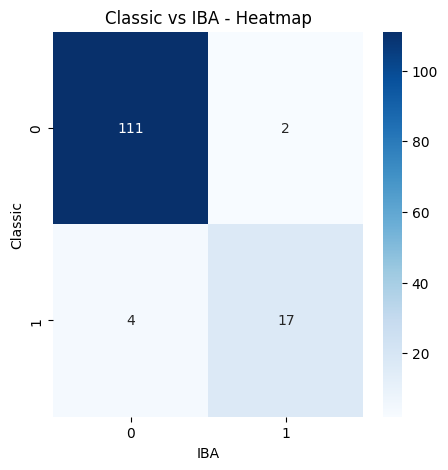

In [15]:
contingency_table = pd.crosstab(data['classic'], data['IBA'])

plt.figure(figsize=(5, 5))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt='g')
plt.xlabel('IBA')
plt.ylabel('Classic')
plt.title('Classic vs IBA - Heatmap')
plt.show()

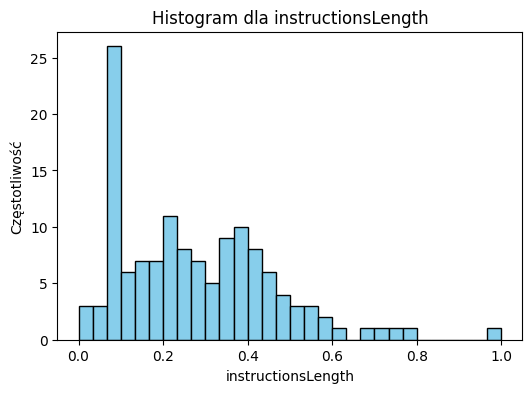

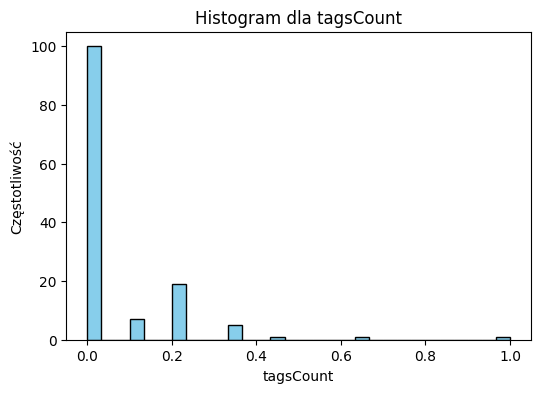

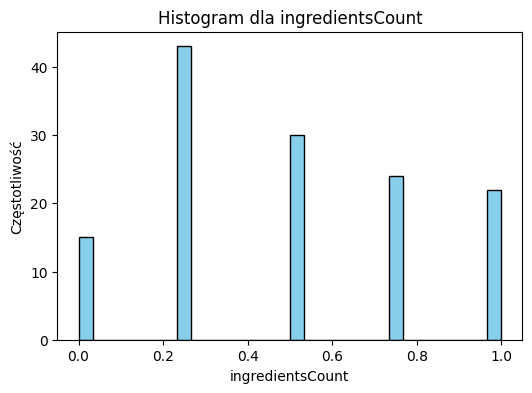

In [16]:
numeric_columns = ['instructionsLength', 'tagsCount', 'ingredientsCount']

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram dla {col}')
    plt.xlabel(col)
    plt.ylabel('Częstotliwość')
    plt.show()


Teraz usunę cechy, które powodowałyby redundancje.

In [17]:
correlation_matrix = data.corr()

threshold = 0.7

to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

data_reduced = data.drop(columns=to_drop)

print("Usunięte cechy:", to_drop)

Usunięte cechy: {'classic', 'glass_Copper Mug', 'category_Ordinary Drink'}


In [18]:
# zapisuje jako coctail_dataset_reduced.csv
data_reduced.to_csv('../data/cocktail_dataset_reduced.csv')

Kolejna część znajduje się w pliku 5_Clustering.ipynb